In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("C:\\Users\\athul\\Downloads\\myexcel - myexcel.csv.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. 

In [7]:
df['Height'] = df['Height']= np.random.randint(150,180,df.shape[0])
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,163,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,176,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,169,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,175,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,154,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,165,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,179,231,Kansas,947276.0


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [9]:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution/len(df))*100
team_summary = pd.DataFrame({
    'Employee count': team_distribution,
    'Percentage' : team_percentage
})
team_summary

,Employee count,Percentage
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


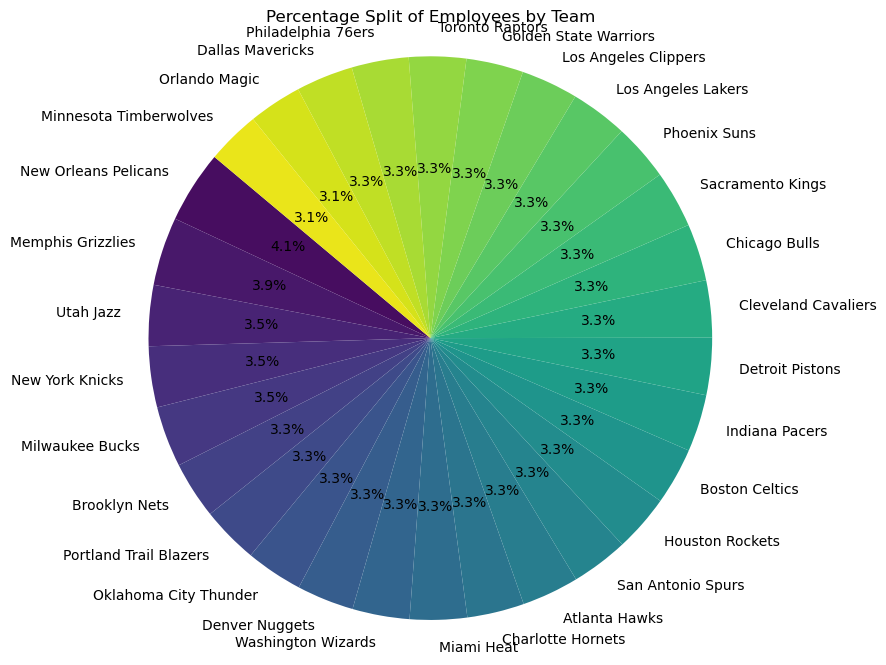

In [13]:
plt.figure(figsize=(8,8))
plt.pie(team_summary['Percentage'], labels=team_summary.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(team_summary)))
plt.title('Percentage Split of Employees by Team')
plt.axis('equal')  
plt.show()

 2. Segregate employees based on their positions within the company

In [44]:
grouped_by_position = df.groupby('Position')['Name'].apply(list)
grouped_by_position

Position
C     [Kelly Olynyk, Jared Sullinger, Tyler Zeller, ...
PF    [Jonas Jerebko, Amir Johnson, Jordan Mickey, C...
PG    [Avery Bradley, Terry Rozier, Marcus Smart, Is...
SF    [Jae Crowder, Thanasis Antetokounmpo, Carmelo ...
SG    [John Holland, R.J. Hunter, Evan Turner, James...
Name: Name, dtype: object

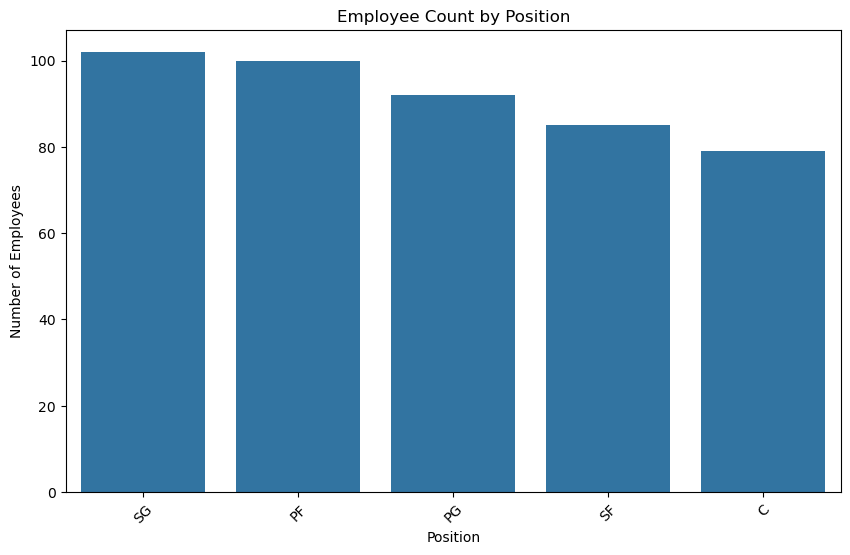

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

3. Identify the predominant age group among employees.

In [34]:
age_bins = [20, 25, 30, 35, 40, 50, 60]  
age_labels = ['20-25', '25-30', '30-35', '35-40', '40-50', '50-60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age Group'].value_counts()
predominant_age_group = age_group_counts.idxmax()

In [36]:
print("Age Group Counts:\n", age_group_counts)
print("Predominant Age Group:", predominant_age_group)

Age Group Counts:
 Age Group
25-30    182
20-25    152
30-35     90
35-40     29
40-50      3
50-60      0
Name: count, dtype: int64
Predominant Age Group: 25-30


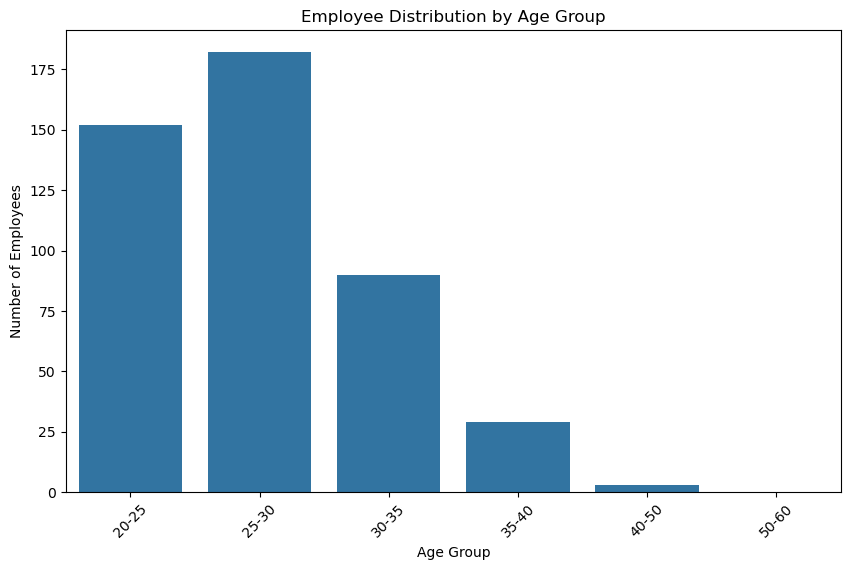

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

4. Discover which team and position have the highest salary expenditure.

In [46]:
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
highest_salary_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]

In [48]:
print("Team and Position with Highest Salary Expenditure:")
print(highest_salary_expenditure)

Team and Position with Highest Salary Expenditure:
Team        Los Angeles Lakers
Position                    SF
Salary              31866445.0
Name: 67, dtype: object


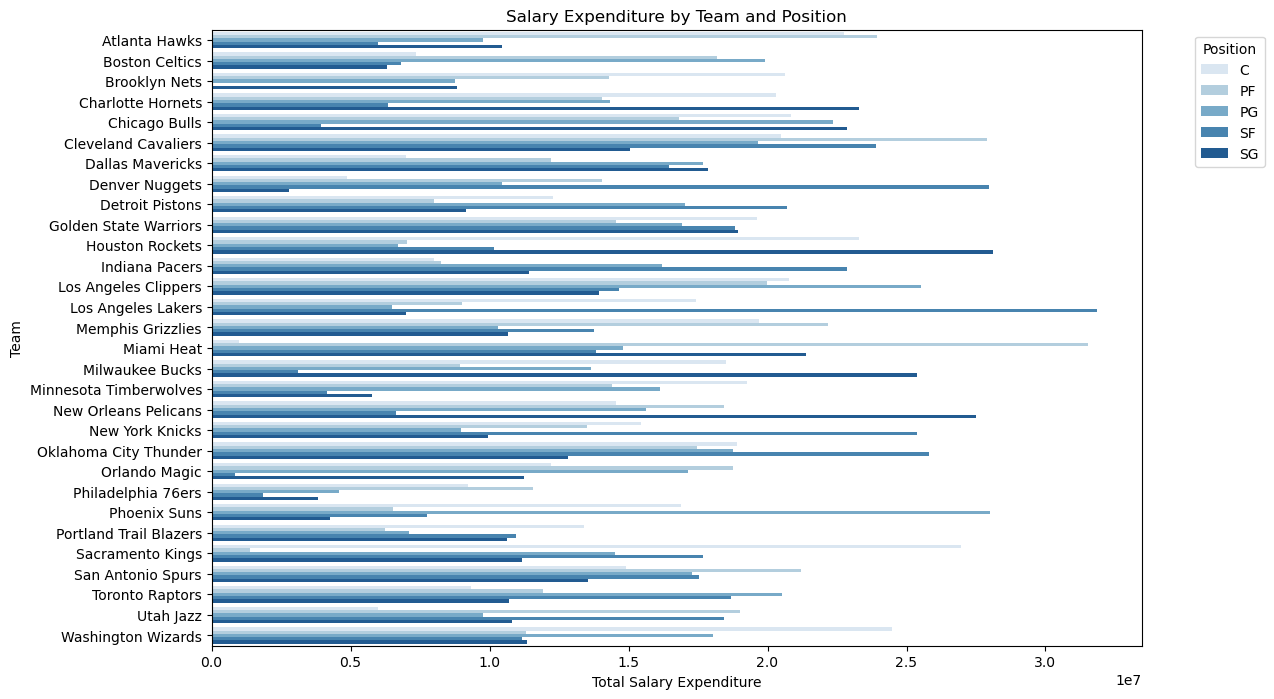

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x='Salary', y='Team', hue='Position', data=salary_expenditure, palette='Blues')
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Total Salary Expenditure')
plt.ylabel('Team')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

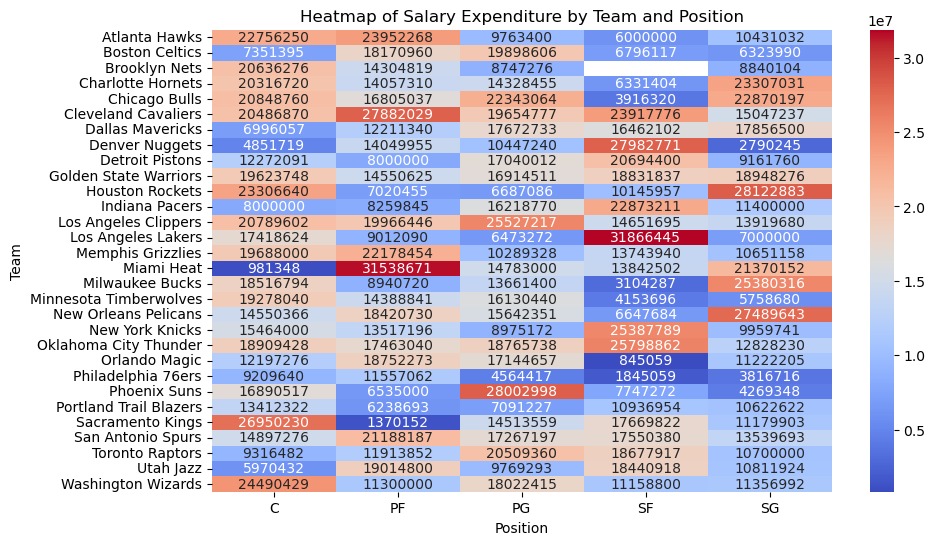

In [69]:
salary_pivot = salary_expenditure.pivot(index='Team', columns='Position', values='Salary')

plt.figure(figsize=(10,6))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap of Salary Expenditure by Team and Position')
plt.xlabel('Position')
plt.ylabel('Team')
plt.show()

5. Investigate if there's any correlation between age and salary, and represent it visually.

Correlation between Age and Salary: 0.21400941226570985


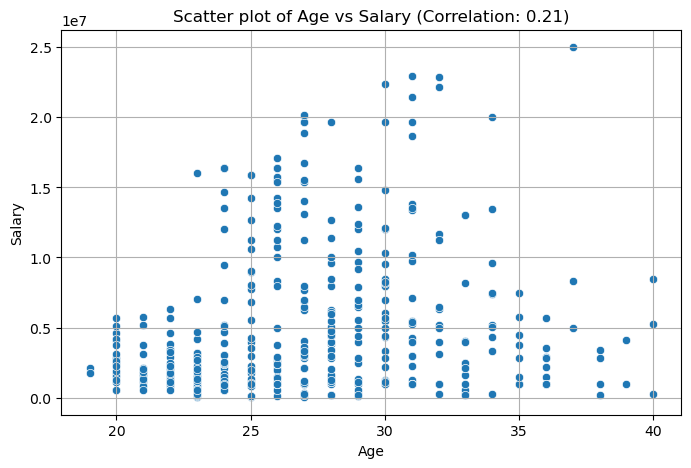

In [75]:
df = df.dropna(subset=['Age', 'Salary'])

correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", correlation)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title(f"Scatter plot of Age vs Salary (Correlation: {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

Graphical Representation:

1. Age Distribution of Players: A histogram showing the frequency of player ages, with a smooth curve (KDE) to indicate the distribution.

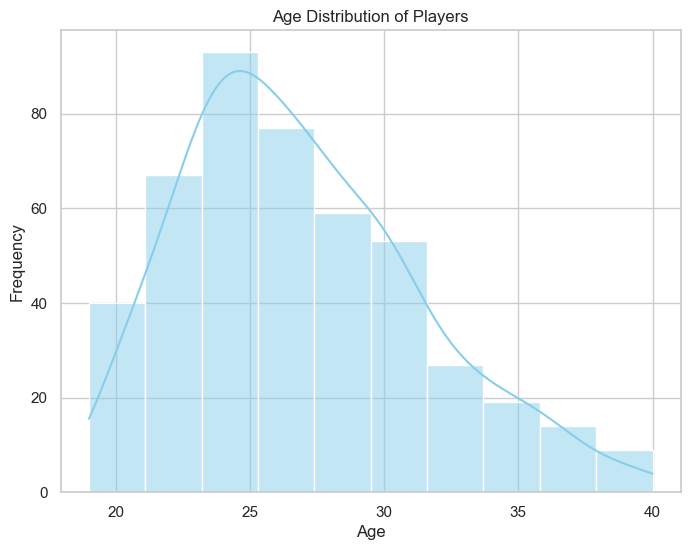

In [12]:
# Age Distribution of Players

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. Salary Distribution by Team: A box plot illustrating how player salaries vary across different teams.

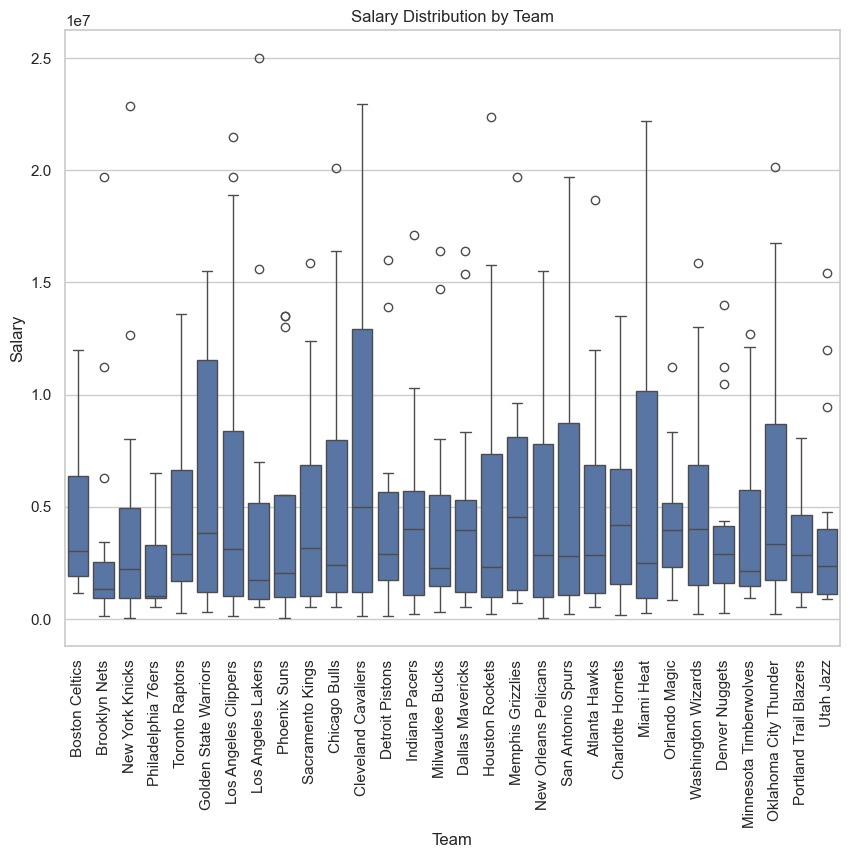

In [32]:
# Salary Distribution by Team

plt.figure(figsize=(10, 8))
sns.boxplot(x='Team', y='Salary',data = df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.show()

3. Player Count by Position: A bar chart representing the number of players for each playing position.

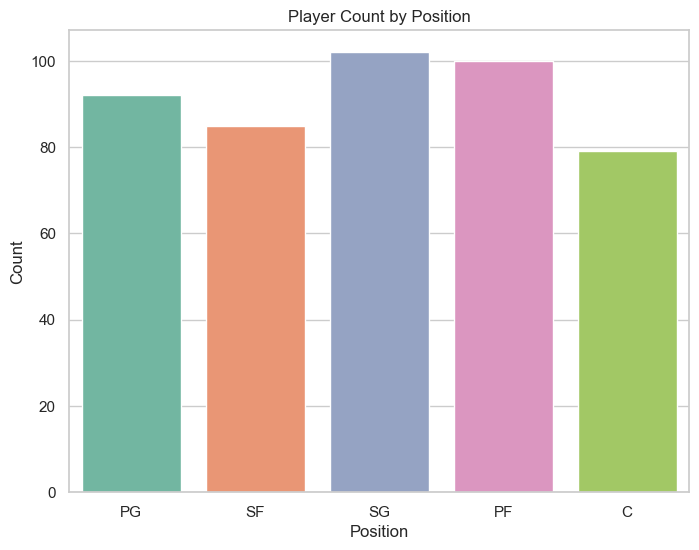

In [44]:
# Player Count by Position 

plt.figure(figsize=(8, 6))
sns.countplot(x='Position', data=df, hue='Position', palette='Set2', dodge=False, legend=False)
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

4. Salary vs. Age: A scatter plot showing the relationship between a player's age and salary, with different colors for positions.

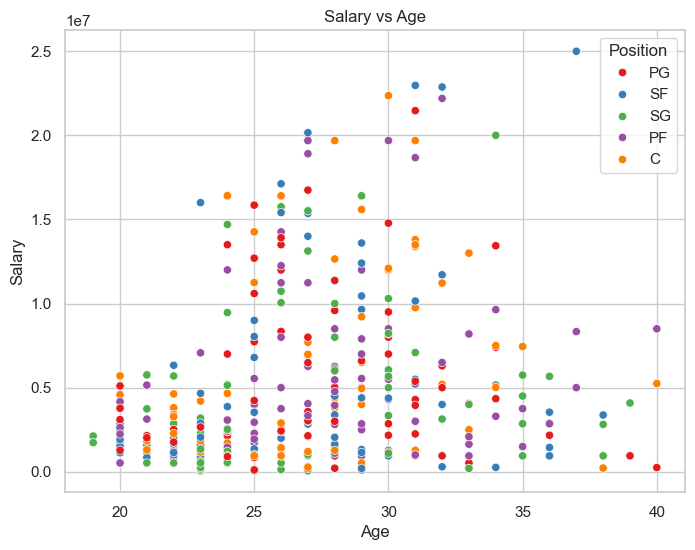

In [30]:
# Salary vs Age

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Position', palette='Set1')
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

5. Top 10 Highest Salaries: A bar chart highlighting the top 10 players with the highest salaries.

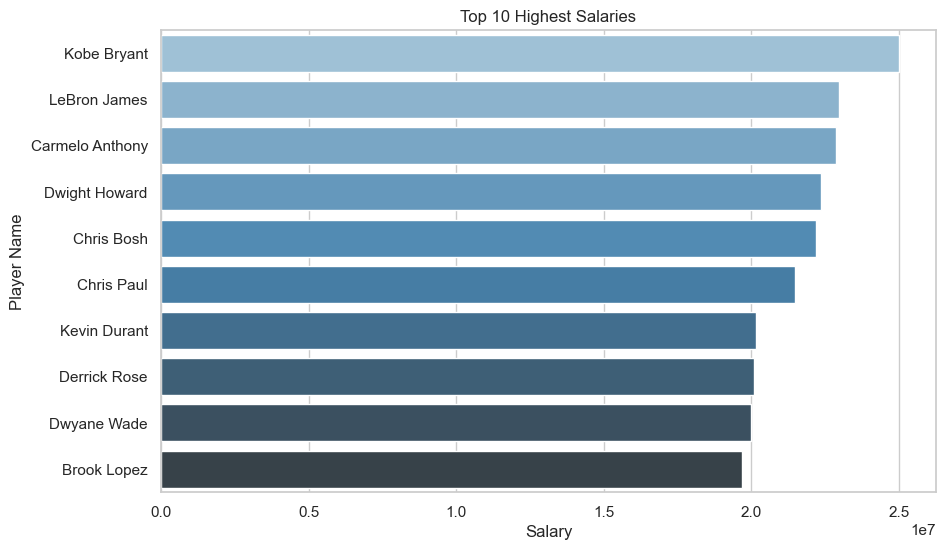

In [38]:
# Top 10 Highest Salaries 

top_10_salaries = df.nlargest(10, 'Salary')
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary', y='Name', data=top_10_salaries, hue='Name', palette='Blues_d', dodge=False, legend=False)
plt.title('Top 10 Highest Salaries')
plt.xlabel('Salary')
plt.ylabel('Player Name')
plt.show()

Overall Insights:

Team Strategy: Teams may adopt different strategies regarding salary distribution, either concentrating wealth among a few key players or distributing it more evenly.

Player Age and Experience: The concentration of players in their mid-to-late 20s suggests that this is a key age for performance and recruitment in professional basketball.

Position Preference: The abundance of guards highlights the modern focus on agility, playmaking, and perimeter shooting, reflecting current trends in basketball strategy.

This analysis provides a snapshot of player demographics, financial investment patterns, and team-building philosophies in the context of professional basketball.